In [284]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import csv
from decimal import Decimal
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [364]:
# update_method_title = "FD6 Charge Update, FFT Wave Update, FFT Derivative"
# update_method_folder = "FD6_charge_FFT_wave_update_FFT_derivative"

# update_method_title = "FD6 Charge Update, FFT Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FFT_derivative"

# update_method_title = r"FD6 Source Update, BDF1 Waves, and FD6 Derivatives"
# update_method_folder = "FD6_charge_BDF_wave_update_fD6_derivative"

# update_method_title = "FD6 Charge Update, FFT Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "FFT Charge Update, FD6 Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_FD6_derivative"

# update_method_title = "      FFT Charge Update, BDF-1 Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_BDF_derivative"

# update_method_title = r"FFT Source Update, BDF1 Waves, and FFT Derivatives"
# update_method_folder = "FFT_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "      Naive Charge Map, BDF-1 Derivative"
# update_method_folder = "vanilla"

# update_method_title = "Non-Iterative FFT";
# update_method_folder = "non_iterative_fft";

update_method_title = r"Naive Source Interpolation, BDF1 Waves and Derivatives"
update_method_folder = "vanilla"

# filePath = matlab.desktop.editor.getActiveFilename;
# projectRoot = fileparts(filePath);
projectRoot = pathlib.Path().resolve()

labels = []

# grid_refinement = [16,32,64]
CFLs = [1]
particle_count_multipliers = [10]

titleFontSize = 32
tickFontSize = 28
subTickFontSize = 16
legendFontSize = 20
lineWidth = 1

for particle_count_multiplier in particle_count_multipliers:
    for CFL in CFLs:
        g16 = str(16)
        g32 = str(32)
        g64 = str(64)

        tag16 = g16 + "x" + g16

        ts_16 = []
        l2_err_16 = []

        ts_32 = []
        l2_err_32 = []

        ts_64 = []
        l2_err_64 = []

        tag_16 = str(g16) + "x" + str(g16)
        path_16 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag16 + "\\"
        csvPath_16 = path_16 + "csv_files\\" + "gauge_error.csv"

        tag_32 = str(g32) + "x" + str(g32)
        path_32 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag_32 + "\\"
        csvPath_32 = path_32 + "csv_files\\" + "gauge_error.csv"

        tag_64 = str(g64) + "x" + str(g64)
        path_64 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag_64 + "\\"
        csvPath_64 = path_64 + "csv_files\\" + "gauge_error.csv"

        # Open the CSV file
        with open(csvPath_16, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_16.append(Decimal(row[0]))
                l2_err_16.append(Decimal(row[1]))
            
        # Open the CSV file
        with open(csvPath_32, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_32.append(Decimal(row[0]))
                l2_err_32.append(Decimal(row[1]))

        # Open the CSV file
        with open(csvPath_64, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_64.append(Decimal(row[0]))
                l2_err_64.append(Decimal(row[1]))

            # plt.plot(ts_16,l2_err_16)
            # plt.ylim([1.365065e-13,1.365075e-13])


C:\Users\StWhite\Documents\stuff\MSU\advisor_work\repos\MOLT\MOLT_Matlab\results\conserving\p_mult_10\CFL_1\no_mod\vanilla\gauge_error_vanilla.jpg


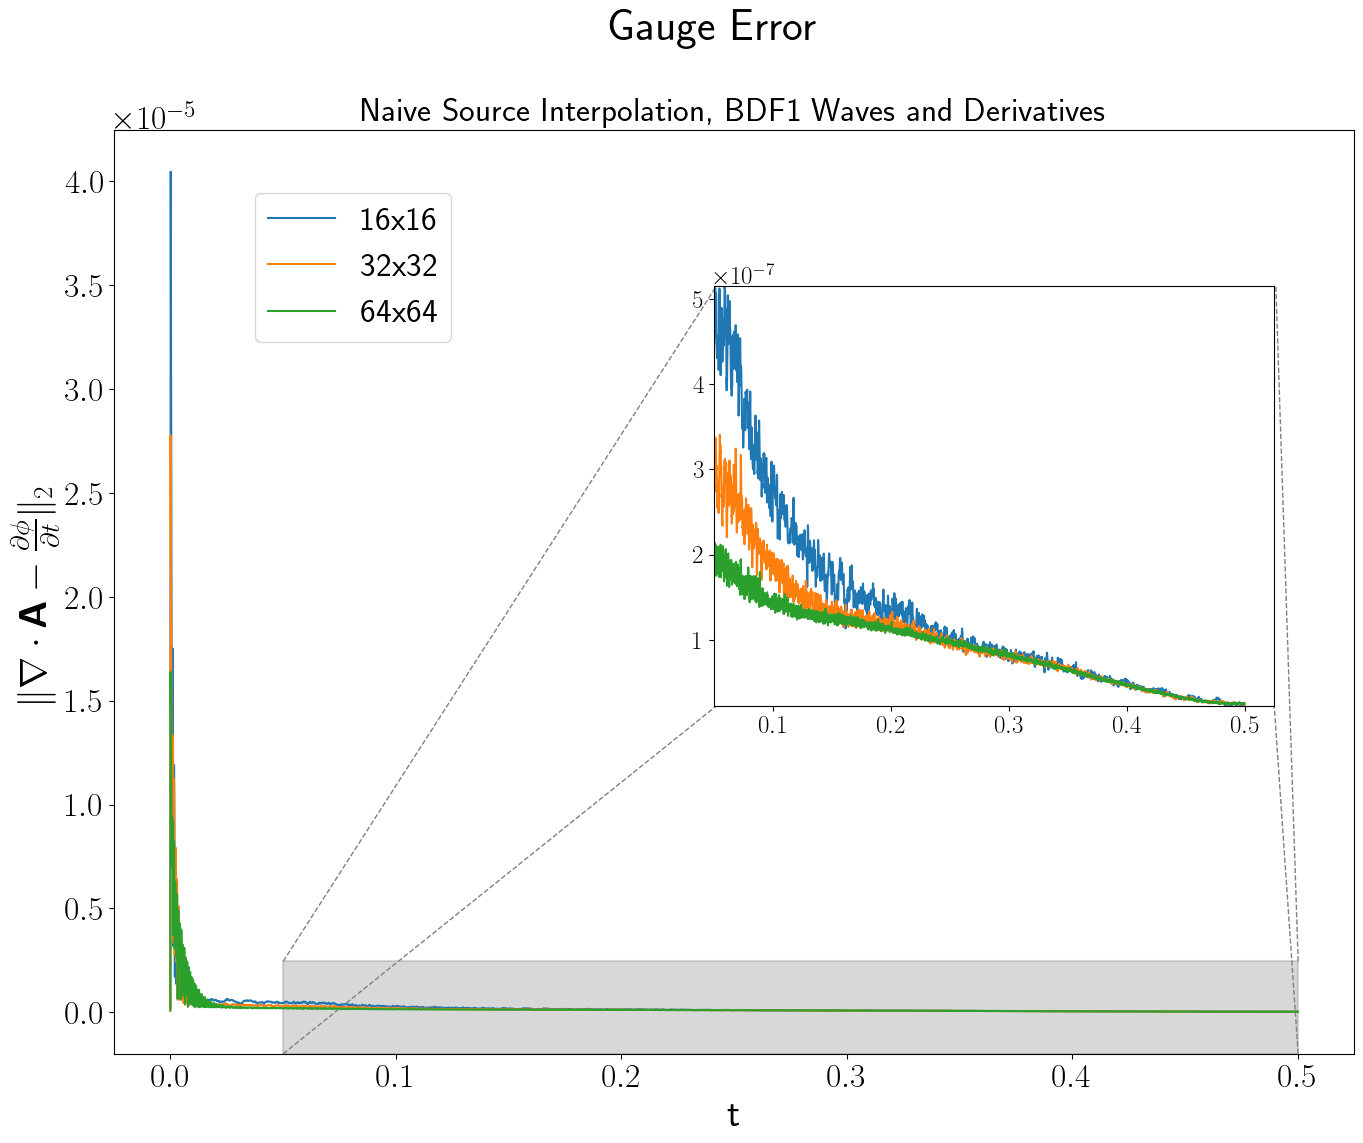

In [365]:
# Define the region to zoom in
zoom_start, zoom_end = np.searchsorted(ts_16,.05), len(ts_16)

# Create the main plot
plt.figure(figsize=(16, 12))
# plt.plot(x, y, label='Main Plot')
plt.plot(ts_16,l2_err_16, label='16x16')
plt.plot(ts_32,l2_err_32, label='32x32')
plt.plot(ts_64,l2_err_64, label='64x64')
plt.suptitle(r"Gauge Error", fontsize=32)
plt.title(update_method_title, fontsize=24)

plt.xlabel(r"t", fontsize=28)
plt.ylabel(r"$\lVert \nabla \cdot \textbf{A} - \frac{\partial \phi}{\partial t}\rVert_2$", fontsize=28)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.gca().yaxis.get_offset_text().set_fontsize(24)

plt.legend(fontsize="24", loc='upper left', bbox_to_anchor=(.1, .95))

plt.axvspan(ts_16[zoom_start], ts_16[zoom_end-1], ymin=0, ymax=.1, color='gray', linewidth=1.5, alpha=0.3)

plt.plot([ts_16[zoom_start], .244], [0, .38], transform=plt.gca().get_xaxis_transform(), color='gray', linestyle='--', linewidth=1)
plt.plot([.955, .5 + .35 + .085], [0, .39], transform=plt.gca().transAxes, color='gray', linestyle='--', linewidth=1)

plt.plot([ts_16[zoom_start], .242], [.1, .83], transform=plt.gca().get_xaxis_transform(), color='gray', linestyle='--', linewidth=1)
plt.plot([.955, .5 + .35 + .087], [.1, .83], transform=plt.gca().transAxes, color='gray', linestyle='--', linewidth=1)

# Create a subplot (inset) within the main plot
axins = plt.axes([0.5, 0.4, 0.35, 0.35])  # [left, bottom, width, height]

# Plot the zoomed-in region
axins.plot(ts_16, l2_err_16, label='16x16')
axins.plot(ts_32, l2_err_32, label='32x32')
axins.plot(ts_64, l2_err_64, label='64x64')
axins.set_xlim(ts_16[zoom_start])
axins.set_ylim(min(l2_err_16[zoom_start:zoom_end]), max(l2_err_16[zoom_start:zoom_end]))
axins.tick_params(axis='both', which='both', labelsize=18)
axins.yaxis.get_offset_text().set_fontsize(18)

# Add a rectangle indicating the zoomed-in region
rect = plt.Rectangle((zoom_start, min(l2_err_16[zoom_start:zoom_end])), zoom_end - zoom_start, max(l2_err_16[zoom_start:zoom_end]) - min(l2_err_16[zoom_start:zoom_end]), edgecolor='r', facecolor='none')
axins.add_patch(rect)

figpath = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                             "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\gauge_error_" + update_method_folder + ".jpg"
print(figpath)
plt.savefig(figpath)
plt.show()

In [ ]:
# update_method_title = "FD6 Charge Update, FFT Wave Update, FFT Derivative"
# update_method_folder = "FD6_charge_FFT_wave_update_FFT_derivative"

# update_method_title = "FD6 Charge Update, FFT Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FFT_derivative"

update_method_title = r"FD6 Source Update, BDF1 Waves, and FD6 Derivatives"
update_method_folder = "FD6_charge_BDF_wave_update_fD6_derivative"

# update_method_title = "FD6 Charge Update, FFT Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "FFT Charge Update, FD6 Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_FD6_derivative"

# update_method_title = "      FFT Charge Update, BDF-1 Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_BDF_derivative"

# update_method_title = r"FFT Source Update, BDF1 Waves, and FFT Derivatives"
# update_method_folder = "FFT_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "      Naive Charge Map, BDF-1 Derivative"
# update_method_folder = "vanilla"

# update_method_title = "Non-Iterative FFT";
# update_method_folder = "non_iterative_fft";

# update_method_title = r"Naive Source Interpolation, BDF1 Waves and Derivatives"
# update_method_folder = "vanilla"

# filePath = matlab.desktop.editor.getActiveFilename;
# projectRoot = fileparts(filePath);
projectRoot = pathlib.Path().resolve()

labels = []

# grid_refinement = [16,32,64]
CFLs = [1]
particle_count_multipliers = [10]

titleFontSize = 32
tickFontSize = 28
subTickFontSize = 16
legendFontSize = 20
lineWidth = 1

for particle_count_multiplier in particle_count_multipliers:
    for CFL in CFLs:
        g64 = str(64)

        tag_64 = str(g64) + "x" + str(g64)
        path_64 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag_64 + "\\"
        csvPath_64 = path_64 + "csv_files\\" + "\\particles\\gauge_error.csv"

        # Open the CSV file
        with open(csvPath_64, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_64.append(Decimal(row[0]))
                l2_err_64.append(Decimal(row[1]))
